# Utils

# Part 1: Code

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [20]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

def encode_labels(y):
    """
    Encodes string class labels to numeric format using LabelEncoder.

    Returns:
        y_encoded: np.ndarray, encoded labels
        encoder: fitted LabelEncoder for later decoding
    """
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Optional: convert to -1/+1 if binary
    if len(encoder.classes_) == 2:
        y_encoded = y_encoded * 2 - 1

    return y_encoded, encoder

def decode_labels(y_encoded, encoder):
    """
    Decodes numeric labels back to original string class labels.

    Args:
        y_encoded: np.ndarray or list of encoded labels (can be {-1, 1} or 0-based)
        encoder: the LabelEncoder used for encoding

    Returns:
        y_decoded: np.ndarray of original labels
    """
    # Handle -1/+1 → 0/1 if binary
    if len(encoder.classes_) == 2 and set(np.unique(y_encoded)) == {-1, 1}:
        y_encoded = (np.array(y_encoded) + 1) // 2

    return encoder.inverse_transform(y_encoded)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Separate features and target
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# Convert target to 1D array
y = y.values.ravel()

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numerical_cols),
		('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
	]
)

# Encode training labels
y_encoded, encoder = encode_labels(y)


In [27]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [28]:
y_train

array([1, 4, 2, ..., 6, 2, 5])

# Results:

# Conclusions:
I chosed Estimation of Obesity Levels Based On Eating Habits and Physical Condition repository because it is a very interesting project.

# Part 2: Code

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        56
           1       0.00      0.00      0.00        62
           2       0.81      0.82      0.82        78
           3       0.00      0.00      0.00        58
           4       0.47      1.00      0.64        63
           5       0.83      0.62      0.71        56
           6       0.68      0.60      0.64        50

    accuracy                           0.59       423
   macro avg       0.46      0.58      0.49       423
weighted avg       0.47      0.59      0.50       423

Accuracy: 0.5863


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_cl

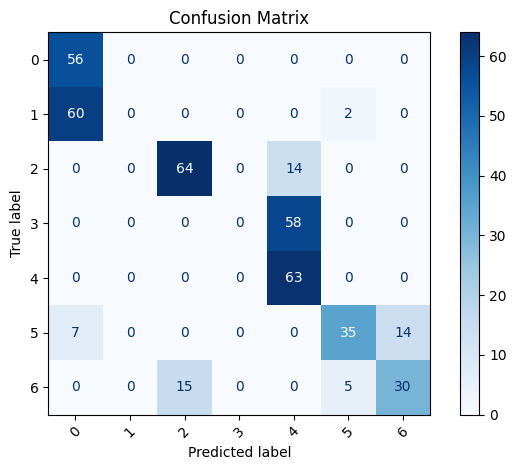

In [36]:
import time

# Create full pipeline with MLP
mlp_pipeline = Pipeline(steps=[
	('preprocessor', preprocessor),
	('classifier', 
	 MLPClassifier(hidden_layer_sizes=(1,),
				   max_iter=300,
				   random_state=time.time_ns() % 2**32))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = mlp_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred = mlp_pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=mlp_pipeline.named_steps['classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [40]:
import numpy as np

# T is number of MLPs
def adaboost_mlp(X, y, T, preprocessor):
    
	# initial weights
	n_samples = X.shape[0]
	weights = np.ones(n_samples) / n_samples
	
	mlps = []
	alphas = []
 
	for _ in range(T):
		# sample data depending on weights
		indices = np.random.choice(
			np.arange(n_samples), 
			size=n_samples, 
			replace=True,
			p=weights
		)
		X_sample = X.iloc[indices]
		y_sample = y[indices]
		
		# for _ in range(T):
		mlp_pipeline = Pipeline(steps=[
			('preprocessor', preprocessor),
			('classifier', 
			MLPClassifier(hidden_layer_sizes=(1,),
						max_iter=300,
						random_state=time.time_ns() % 2**32))
		])

		# Train the model
		mlp_pipeline.fit(X_sample, y_sample)
  
		# compute weighted error
		y_pred = mlp_pipeline.predict(X)
		error = np.sum(weights * (y_pred != y))
		print(f"Error: {error:.4f}")
  
		# compute alpha
		alpha = (1/2) * np.log((1 - error) /(error + 1e+10)) # to avoid division by zero
  
		# update weights
		weights *= np.exp(-alpha * y * y_pred)
		# normalize weights
		weights /= np.sum(weights)
  
		# # DEBUG: Check types and shapes
		# print(f"weights type: {type(weights)}, shape: {weights.shape}")
		# print(f"y type: {type(y)}, shape: {y.shape}")
		# print(f"y_pred type: {type(y_pred)}, shape: {y_pred.shape}")

		# # Convert y and y_pred to NumPy arrays
		# y_arr = np.array(y)
		# y_pred_arr = np.array(y_pred)

		# print(f"Converted y_arr dtype: {y_arr.dtype}, shape: {y_arr.shape}")
		# print(f"Converted y_pred_arr dtype: {y_pred_arr.dtype}, shape: {y_pred_arr.shape}")

		# # Check values
		# print(f"First 5 y_arr: {y_arr[:5]}")
		# print(f"First 5 y_pred_arr: {y_pred_arr[:5]}")

		# # Now update weights
		# try:
		# 	weights *= np.exp(-alpha * y_arr * y_pred_arr)
		# except Exception as e:
		# 	print("‼️ Error during weight update:", e)
		# 	raise

		# # Normalize weights
		# weights /= np.sum(weights)

  
		# store the model and alpha
		mlps.append(mlp_pipeline)
		alphas.append(alpha)
  
	return mlps, alphas

import numpy as np

def predict_adaboost(X, classifiers, alphas):
    """
    Predicts class labels for input X using AdaBoost with multiclass MLPs.

    Args:
        X: np.ndarray or DataFrame of input features
        classifiers: list of trained pipelines (each with MLP)
        alphas: list of alpha weights for each classifier

    Returns:
        y_pred: np.ndarray of predicted class indices
    """
    n_samples = len(X)
    classes = classifiers[0].named_steps['classifier'].classes_
    class_indices = {label: idx for idx, label in enumerate(classes)}
    K = len(classes)
    
    votes = np.zeros((n_samples, K))

    for clf, alpha in zip(classifiers, alphas):
        pred = clf.predict(X)  # returns class labels (e.g., 'Obesity_Type_I')
        pred_idx = np.array([class_indices[p] for p in pred])
        votes[np.arange(n_samples), pred_idx] += alpha

    y_pred_indices = np.argmax(votes, axis=1)
    return np.array([classes[i] for i in y_pred_indices])



In [41]:

mlps, alphas = adaboost_mlp(X_train, y_train, 10, preprocessor)


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Error: 0.4348


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Error: 0.0000


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Error: 0.0000


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Error: 0.0000
Error: 0.0000


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Error: 0.0000


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Error: 0.0000
Error: 0.0000
Error: 0.0000
Error: 0.0000


In [43]:
X_test.shape

(423, 16)

In [46]:
from sklearn.compose import ColumnTransformer

# After fitting preprocessor on X_train
preprocessor.fit(X_test)

# Check final feature count
X_transformed = preprocessor.transform(X_train)
print("Transformed shape:", X_transformed.shape)


Transformed shape: (1688, 30)


In [44]:

y_pred = predict_adaboost(X_train, mlps, alphas)
y_pred_decoded = decode_labels(y_pred, encoder)  # if you encoded earlier

y_train_decoded = decode_labels(y_train, encoder)  # if you encoded earlier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test must be the original (unencoded) ground truth labels
accuracy = accuracy_score(y_train_decoded, y_pred_decoded)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_train_decoded, y_pred_decoded, labels=encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("AdaBoost MLP Confusion Matrix")
plt.tight_layout()
plt.show()


ValueError: X has 29 features, but MLPClassifier is expecting 31 features as input.

In [63]:
import time
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

def adaboost_mlp(X, y, T, numerical_cols, categorical_cols):
    n_samples = X.shape[0]
    weights = np.ones(n_samples) / n_samples  # Uniform initial weights

    mlps = []
    alphas = []

    y = np.array(y)  # Ensure y is numpy array
    class_labels = np.unique(y)
    is_binary = len(class_labels) == 2
    if is_binary:
        label_map = {class_labels[0]: -1, class_labels[1]: 1}
        y_numeric = np.array([label_map[yi] for yi in y])
    else:
        label_map = {label: idx for idx, label in enumerate(class_labels)}
        y_numeric = np.array([label_map[yi] for yi in y])

    for t in range(T):
        # Sample data based on weights
        indices = np.random.choice(np.arange(n_samples), size=n_samples, replace=True, p=weights)
        X_sample = X.iloc[indices]
        y_sample = y[indices]

        # NEW: Define fresh preprocessor for this round
        preprocessor = ColumnTransformer(transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

        # Build pipeline
        mlp_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', MLPClassifier(hidden_layer_sizes=(1,),
                                         max_iter=1000,
                                         random_state=time.time_ns() % (2**32)))
        ])

        # Train the model
        mlp_pipeline.fit(X_sample, y_sample)

        # Predict on full training data (raw features)
        y_pred = mlp_pipeline.predict(X)
        y_pred_numeric = np.array([label_map[yi] for yi in y_pred])

        # Compute weighted error
        error = np.sum(weights * (y_numeric != y_pred_numeric)) / np.sum(weights)
        print(f"Round {t+1}: error = {error:.4f}")

        if error >= 1 - (1 / len(class_labels)):
            print("Skipping this weak learner due to high error.")
            continue

        # Compute alpha
        alpha = 0.5 * np.log((1 - error) / (error + 1e-10))

        # Update weights
        weights *= np.exp(-alpha * (y_numeric == y_pred_numeric).astype(int) * 2 - 1)
        weights /= np.sum(weights)  # Normalize

        mlps.append(mlp_pipeline)
        alphas.append(alpha)

    return mlps, alphas

def predict_adaboost(X, classifiers, alphas):
    """
    Predicts class labels for input X using AdaBoost with multiclass MLPs.

    Args:
        X: pd.DataFrame of raw input features
        classifiers: list of trained pipelines (each with MLP)
        alphas: list of alpha weights for each classifier

    Returns:
        y_pred: np.ndarray of predicted class labels
    """
    n_samples = len(X)
    classes = classifiers[0].named_steps['classifier'].classes_
    class_indices = {label: idx for idx, label in enumerate(classes)}
    K = len(classes)

    votes = np.zeros((n_samples, K))

    for clf, alpha in zip(classifiers, alphas):
        pred = clf.predict(X)  # Automatically includes preprocessing
        pred_idx = np.array([class_indices[p] for p in pred])
        votes[np.arange(n_samples), pred_idx] += alpha

    y_pred_indices = np.argmax(votes, axis=1)
    return np.array([classes[i] for i in y_pred_indices])


In [64]:
# # Encode labels
# y_encoded, encoder = encode_labels(y)

# # Split your data
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, ...)

# Define columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Train AdaBoost with MLPs
mlps, alphas = adaboost_mlp(X_train, y_train, T=36,
                             numerical_cols=numerical_cols,
                             categorical_cols=categorical_cols)

# Predict
y_pred = predict_adaboost(X_test, mlps, alphas)
y_pred_decoded = decode_labels(y_pred, encoder)


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1: error = 0.2731
Round 2: error = 0.5821


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 3: error = 0.2451
Round 4: error = 0.5414
Round 5: error = 0.4876


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 6: error = 0.3502


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 7: error = 0.3376


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 8: error = 0.3426
Round 9: error = 0.5646


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 10: error = 0.3925


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 11: error = 0.4382


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 12: error = 0.3678


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 13: error = 0.4083


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 14: error = 0.4383


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 15: error = 0.3465


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 16: error = 0.4760


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 17: error = 0.3709


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 18: error = 0.3978


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 19: error = 0.4868


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 20: error = 0.4541


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 21: error = 0.4500


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 22: error = 0.4339


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 23: error = 0.4207


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 24: error = 0.4278


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 25: error = 0.4173


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 26: error = 0.3815
Round 27: error = 0.5634


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 28: error = 0.4348


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 29: error = 0.4510


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 30: error = 0.5218


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 31: error = 0.4110


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 32: error = 0.4551
Round 33: error = 0.8476


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 34: error = 0.3623


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 35: error = 0.4040
Round 36: error = 0.4592


C:\Users\btsts\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


WHY DID WE ADD PREPROCESSOR AND PIPELINE TO ADABOOST LOOP?

Accuracy: 0.9314


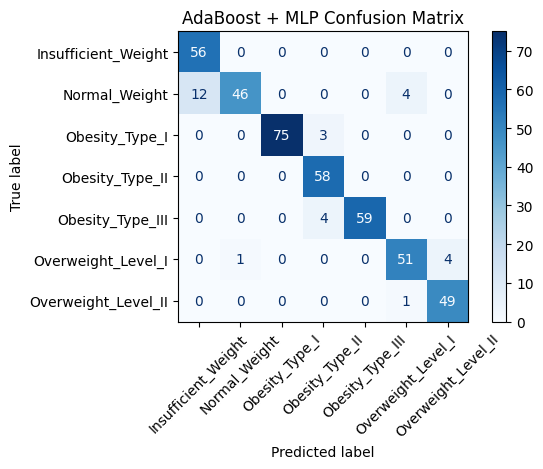

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Optional: decode y_test if it's still encoded
y_test_decoded = decode_labels(y_test, encoder)

# Accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

# Plot
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("AdaBoost + MLP Confusion Matrix")
plt.tight_layout()
plt.show()


# Results:

# Comments:
Maybe the reason behind choosing just one hidden layer is obtaining a weak learner that can be combined with other weak learners to create a strong learner using adaboost.

# Part 3: Code

# Results:

# Comments: